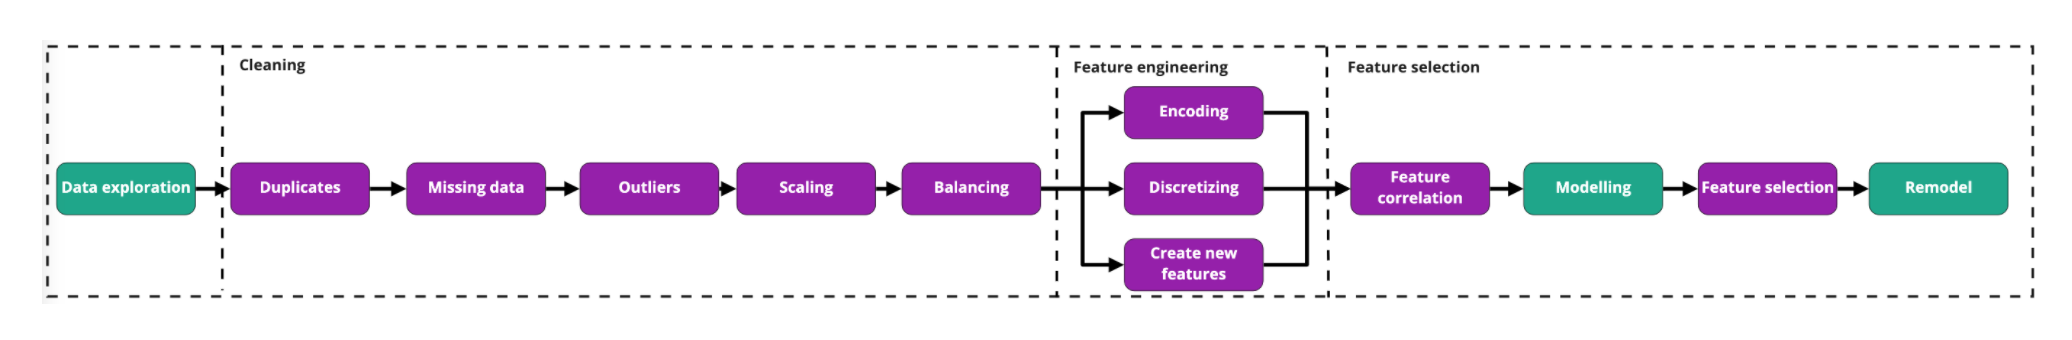

# Import des données

Le dataset est tiré d'ici https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data 

Nous allons nous concentrer sur quelques **features** : `GrLivArea`, `BedroomAbvGr`, `KitchenAbvGr`, `Alley`, `Street`, `Pesos` et `OverallCond`.

In [182]:
import pandas as pd

data = pd.read_csv("Data/ML_Houses_dataset_train2.csv")

data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond', 
             'Pesos','Alley','Street','SalePrice']]

data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710.0,3.0,1.0,5.0,4170000.0,NaN,Pave,208500.0
1,1262.0,3.0,1.0,8.0,3630000.0,NaN,Pave,181500.0
2,1786.0,3.0,1.0,5.0,4470000.0,NaN,Pave,223500.0
3,1717.0,3.0,1.0,5.0,2800000.0,NaN,Pave,140000.0
4,2198.0,4.0,1.0,5.0,NaN,NaN,Pave,250000.0
...,...,...,...,...,...,...,...,...
1455,1647.0,3.0,1.0,5.0,3500000.0,NaN,Pave,175000.0
1456,2073.0,3.0,1.0,6.0,4200000.0,NaN,Pave,210000.0
1457,2340.0,4.0,1.0,9.0,5330000.0,NaN,Pave,266500.0
1458,1078.0,2.0,1.0,6.0,2842500.0,NaN,Pave,142125.0


# Drop duplicates

⚠️ **Data Leakage**

Afin d'évaluer la capacité d'un modèle, il est crucial que les données du jeu de test restent non vues par le modèle lorsqu'il apprend des données du jeu d'entraînement.

Si des doublons existent à la fois dans le `training set` et le `test set`, cela peut entraîner de l'overfitting ou des socres peu fiables.

Il se peut qu'il y ai des duplicatas dans les données.  
Une bonne pratique est de **toujours** vérifier cela en 1ère étape de preprocessing.

**Cependant**, cela ne veut pas dire qu'il faut systématiquement les supprimer. Votre connaissance du dataset, votre but final et votre bon sens qui vont influencer votre décision.
- Est-ce que cela a du sens que ces doublons existent ?
- Comment vont-ils impacter mon analyse/modèle ?
- Qu'est-ce que je cherche à faire avec mon analyse/modèle ?

Pour observer les duplicatas, on peut utiliser la méthode `.duplicated()` dans un masque booléen.

In [183]:
len(data)

1460

In [184]:
data.loc[data.duplicated()]

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
193,1709.0,3.0,1.0,5.0,2600000.0,NaN,Pave,130000.0
831,1200.0,2.0,1.0,5.0,3020000.0,Pave,Pave,151000.0
1436,864.0,3.0,1.0,6.0,2410000.0,NaN,Pave,120500.0


In [185]:
data = data.drop_duplicates()

In [186]:
len(data)

1457


# Les valeurs manquantes

**Erreurs communes pour les valeurs manquantes**
* Erreur de programmation
* Échec de la mesure (par exemple, un patient participant à une étude clinique manque une visite prévue)
* Événements aléatoires (par exemple, le dispositif de collecte des données météorologiques tombe en panne d'électricité)
* ...

**Représentations communes des valeurs manquantes**
* NaN (not a number)
* Grandes valeurs négatives (-99,-999)
* ?
* ...

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1457 non-null   float64
 1   BedroomAbvGr  1457 non-null   float64
 2   KitchenAbvGr  1457 non-null   float64
 3   OverallCond   1457 non-null   float64
 4   Pesos         1447 non-null   float64
 5   Alley         90 non-null     object 
 6   Street        1457 non-null   object 
 7   SalePrice     1457 non-null   float64
dtypes: float64(6), object(2)
memory usage: 102.4+ KB


In [188]:
data.isnull().sum()

GrLivArea          0
BedroomAbvGr       0
KitchenAbvGr       0
OverallCond        0
Pesos             10
Alley           1367
Street             0
SalePrice          0
dtype: int64

## Les packages pour l'EDA (exemple avec ydata-profiling)

In [189]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling Report")

In [250]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [191]:
missing_values = data.isna().sum()
missing_values = missing_values[missing_values != 0]

<Axes: >

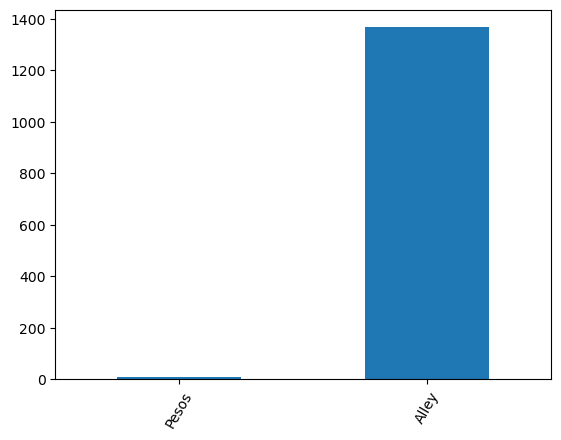

In [192]:
import seaborn as sns
missing_values.plot.bar(x='index', y=missing_values.index, rot=60)

In [193]:
data.isnull().sum().sort_values(ascending = False) / len(data)

Alley           0.938229
Pesos           0.006863
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
Street          0.000000
SalePrice       0.000000
dtype: float64

Il est temps de considérer les colonnes qui ont des valeurs manquantes au cas par cas.

# Les valeurs manquantes de la colonne `Alley`

In [194]:
data['Alley'].isna().sum()

1367

In [195]:
data['Alley'].value_counts(dropna=False)

NaN     1367
Grvl      50
Pave      40
Name: Alley, dtype: int64

👉 En allant voir la documentation pour cette colonne, on constate qu'il est intéréssant d'investiguer.

On constate que les valeurs manquantes ici, représente une information.  
On va donc prendre les choses en mains, plutôt que de rejeter cette colonne du jeu de données.

In [196]:
data['Alley'].fillna("NoAlley", inplace=True)
data['Alley'].value_counts(dropna=False)

C:\Users\luca5\AppData\Local\Temp\ipykernel_38840\1815190218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Alley'].fillna("NoAlley", inplace=True)


NoAlley    1367
Grvl         50
Pave         40
Name: Alley, dtype: int64

# **Les valeurs manquantes de la colonne `Pesos`**

La colonne Pesos représente le prix en pesos.  
On pourrait, et même devrait rejetter cette colonne étant donnée que l'on a déjà cette information dans la colonne `SalePrice` et qu'elle représente tout simplement un data leakage.

Cepandant, pour montrer un exemple, on va plutôt faire de l'`imputing` ici pour les 10 valeurs manquantes.

In [197]:
# Option 1 : Rejetter ses 10 observations.

len(data.dropna(subset = ['Pesos']))

1447

Option 2: Faire de l'`imputing`, c'est à dire de remplacer les valeurs manquantes par une valeur convenable, le mode (plus adapté pour les catégories, surtout si une domine), la moyenne, la médiane (plus adapté si il ya des gros outliers qui influencent la moyenne) ou encore d'autres solutions plus complexes (une régression ou autre calcul).

Bien que cette méthode produit un léger biais dans nos données, elle permet de ne pas perdre de l'information contenu dans les autres colonnes.

In [198]:
# Option 2
import numpy as np
data["Pesos"].replace(np.nan, data["Pesos"].mean())

0       4.170000e+06
1       3.630000e+06
2       4.470000e+06
3       2.800000e+06
4       3.615882e+06
            ...     
1455    3.500000e+06
1456    4.200000e+06
1457    5.330000e+06
1458    2.842500e+06
1459    2.950000e+06
Name: Pesos, Length: 1457, dtype: float64

On pourrait investiguer pour déterminer les valeurs à attribuer pour ces valeurs manquantes. Ici on voit que la valeur en Pesos est juste 20 fois la valeur de SalePrice

In [199]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710.0,3.0,1.0,5.0,4170000.0,NoAlley,Pave,208500.0
1,1262.0,3.0,1.0,8.0,3630000.0,NoAlley,Pave,181500.0
2,1786.0,3.0,1.0,5.0,4470000.0,NoAlley,Pave,223500.0
3,1717.0,3.0,1.0,5.0,2800000.0,NoAlley,Pave,140000.0
4,2198.0,4.0,1.0,5.0,NaN,NoAlley,Pave,250000.0


Conversion dollar en pesos:

In [200]:
4170000.0 / 208500

20.0

On assigne les valeurs aux indices qui ont des valeurs manquantes.

In [201]:
data["Pesos"] = data["SalePrice"] * 20

C:\Users\luca5\AppData\Local\Temp\ipykernel_38840\3670167300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Pesos"] = data["SalePrice"] * 20


# Missing Data - SimpleImputer (Preprocessing Tool - Sklearn)

Utiliser un outil sklearn comme `SimpleImputer` peut nous permettre d'ajouter cet étape dans une [pipeline sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [202]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy= 'mean')

imputer.fit(data[['Pesos']])


SimpleImputer()

In [203]:
imputer.statistics_

array([3620363.01990391])

In [204]:
data["Pesos"] = imputer.transform(data[['Pesos']])

C:\Users\luca5\AppData\Local\Temp\ipykernel_38840\675201421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Pesos"] = imputer.transform(data[['Pesos']])


In [205]:
data["Pesos"] = imputer.fit_transform(data[['Pesos']])

C:\Users\luca5\AppData\Local\Temp\ipykernel_38840\2669252637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Pesos"] = imputer.fit_transform(data[['Pesos']])


Il n'y a plus de valeurs manquantes pour la colonne `Pesos`.

In [206]:
data.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
KitchenAbvGr    0
OverallCond     0
Pesos           0
Alley           0
Street          0
SalePrice       0
dtype: int64

💡Suggestion :
* Plus de 30% des valeurs manquantes : Evacuer la colonne
* Moins de 30 % des valeurs manquantes : remplacer par une valeur qui a du sens, par exemple la médiane ou la moyenne.

🚨N'oublie pas qu'une méthode d"imputation" génère un biais.

* Remplacer des valeurs manquantes par d'autres valeurs peut introduire un biais humain dans notre jeu de données.
* Il faut donc veiller à opter pour la meilleur stratégie possible.

# Estimateur Vs Transformeur

**.fit() and .transform()  ==  TRANSFORMER (Preprocessing Tools)**  
**.fit() and .score()  == ESTIMATOR (Algorithm)**



# Outliers

**Excellente ressource sur comment traiter et comment détecter les outliers :**

https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

Evacuer les outliers permet d'avoir un jeu de données représentatif de la réalité.  
Par conséquent, le modèle, entraîné sur des données représentatives sera plus fiable en ce qui concerne ses prédictions.

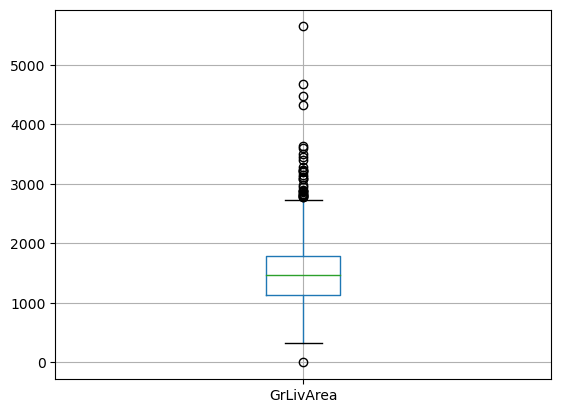

In [207]:
import matplotlib.pyplot as plt
data[['GrLivArea']].boxplot()
plt.show()

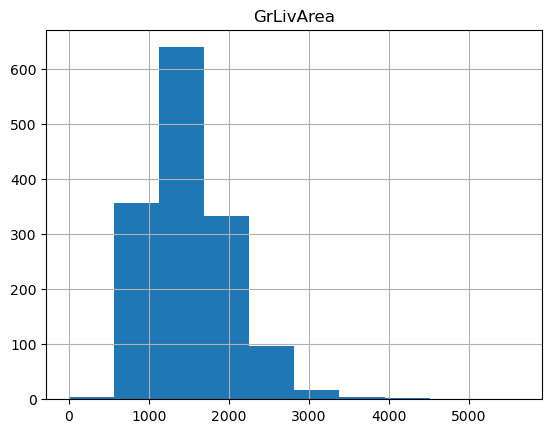

In [208]:
data[['GrLivArea']].hist()
plt.show()

In [209]:
data["GrLivArea"].min()

-1.0

In [210]:
data['GrLivArea'].idxmin()

10

Cette valeur est une valeur abérrante. En effet, il ne peut pas y avoir de surface habitable de -1 pied carré.

In [211]:
data = data.drop(10).reset_index(drop=True)
data.head(15)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710.0,3.0,1.0,5.0,4170000.0,NoAlley,Pave,208500.0
1,1262.0,3.0,1.0,8.0,3630000.0,NoAlley,Pave,181500.0
2,1786.0,3.0,1.0,5.0,4470000.0,NoAlley,Pave,223500.0
3,1717.0,3.0,1.0,5.0,2800000.0,NoAlley,Pave,140000.0
4,2198.0,4.0,1.0,5.0,5000000.0,NoAlley,Pave,250000.0
5,1362.0,1.0,1.0,5.0,2860000.0,NoAlley,Pave,143000.0
6,1694.0,3.0,1.0,5.0,6140000.0,NoAlley,Pave,307000.0
7,2090.0,3.0,1.0,6.0,4000000.0,NoAlley,Pave,200000.0
8,1774.0,2.0,2.0,5.0,2598000.0,NoAlley,Pave,129900.0
9,1077.0,2.0,2.0,6.0,2360000.0,NoAlley,Pave,118000.0


<Axes: >

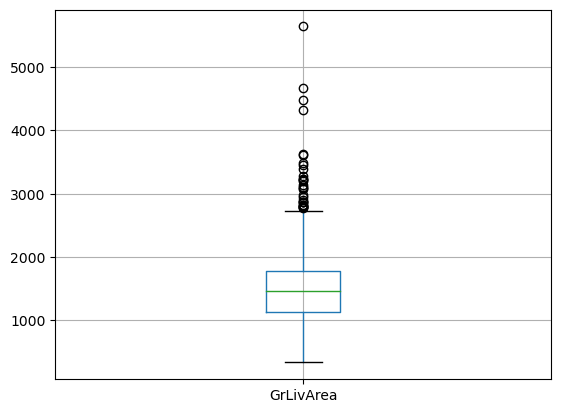

In [212]:
data[['GrLivArea']].boxplot()

On a bien évacué l'outlier.

Des maisons aussi grandes existes. Il s'agit d'une valeur exceptionnelle, mais pas abérrante.

## Outliers dans une distribution normale

Une autre technique pour déterminer les outliers, est de calculer le z-score de nos observations.

Attention, cette technique est applicable quand on a une distribution qui ressemble à une loi normale (qui ressemble en gros à une cloche)

Réferez vous à cette ressource : 

https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/

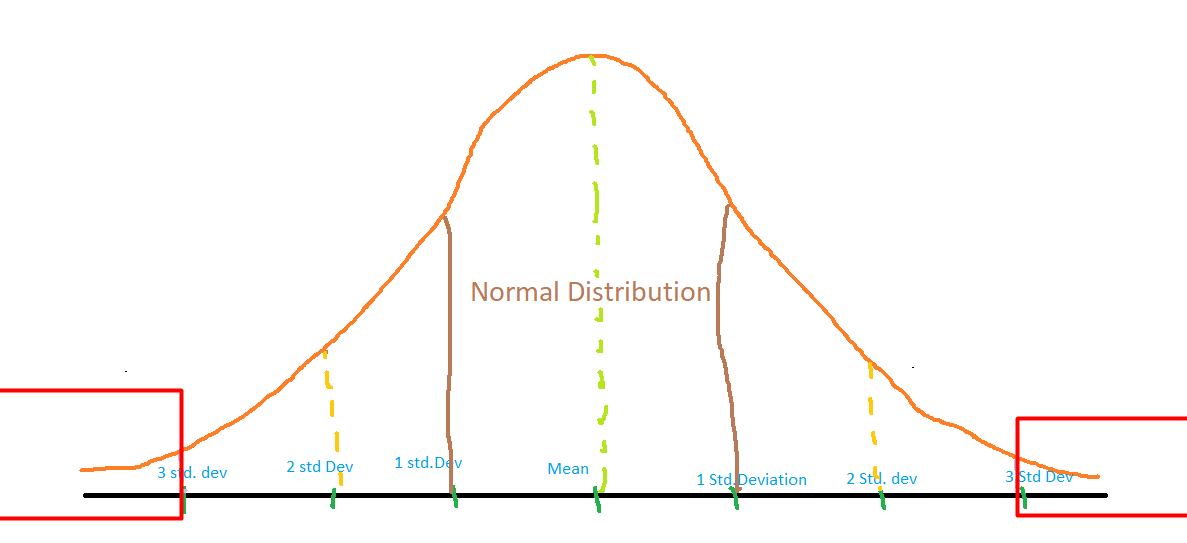

les outliers se trouvent dans les rectangles rouges

In [213]:
mean = np.mean(data['GrLivArea']) 
std = np.std(data['GrLivArea']) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is 1516.3214285714287
std. deviation is 525.5064404328651


In [251]:
threshold = 3
outlier = [] 
for i in data['GrLivArea']: 
    z = (i-mean)/std 
    if z > threshold or z < -threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is [3222.0, 3608.0, 3112.0, 3493.0, 3228.0, 4676.0, 3194.0, 3395.0, 4316.0, 3279.0, 3140.0, 3627.0, 4476.0, 3447.0, 5642.0, 3238.0]


## Outliers dans d'autres situations

Les autres techniques sont de se baser sur l'IQR (Inter Quartile Range) ou sur un pourcentage, comme décrites dans la ressource : 

https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

In [215]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710.0,3.0,1.0,5.0,4170000.0,NoAlley,Pave,208500.0
1,1262.0,3.0,1.0,8.0,3630000.0,NoAlley,Pave,181500.0
2,1786.0,3.0,1.0,5.0,4470000.0,NoAlley,Pave,223500.0
3,1717.0,3.0,1.0,5.0,2800000.0,NoAlley,Pave,140000.0
4,2198.0,4.0,1.0,5.0,5000000.0,NoAlley,Pave,250000.0
...,...,...,...,...,...,...,...,...
1451,1647.0,3.0,1.0,5.0,3500000.0,NoAlley,Pave,175000.0
1452,2073.0,3.0,1.0,6.0,4200000.0,NoAlley,Pave,210000.0
1453,2340.0,4.0,1.0,9.0,5330000.0,NoAlley,Pave,266500.0
1454,1078.0,2.0,1.0,6.0,2842500.0,NoAlley,Pave,142125.0


# Scaling (Mise à l'échelle)

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

https://python-data-science.readthedocs.io/en/latest/normalisation.html

https://www.kaggle.com/code/alexisbcook/scaling-and-normalization 



ℹ️ Il s'agit de transformer les valeurs des colonnes numériques en une plage commune plus petite.

**Pourquoi ?**

* Les colonnes qui ont de plus grandes valeurs par rapport à d'autres colonnes peuvent, à tort, être interprété comme plus importantes par le modèle lors de l'entraînement.
* La mise à l'échelle vers de plus petites plages, pour l'ensemble des colonne, améliore aussi l'efficacité du calcul.
* Toutes les colonnes sont considérés équitablement par l'algorithme.

Finalement, il s'agit de traduire ce qui est interprétable pour nous être humain, en ce qui est interprétable pour les algorithmes.

Exemples des Scalers les plus communs


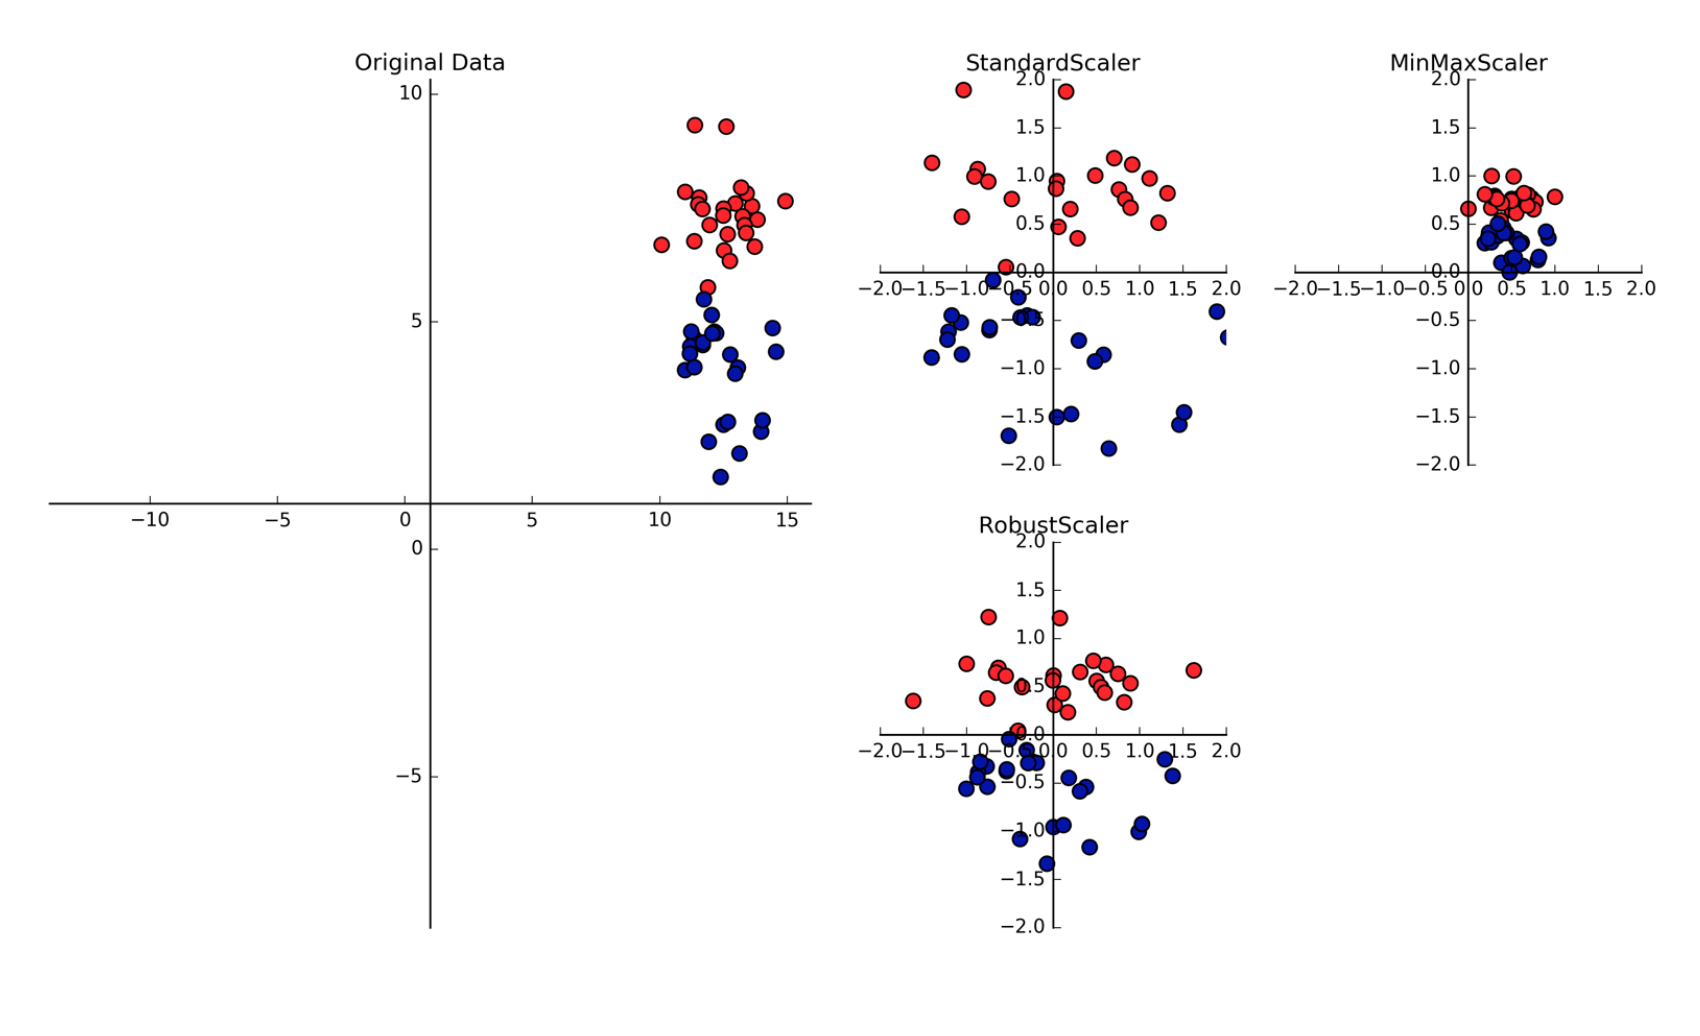



# StandardScaler

--> [**Notebook explicatif**](https://colab.research.google.com/drive/124ZkIeRML14RIzYyS7UeCZAQBMCYM-0W?usp=share_link)

Chaque valeur de la colonne sera le ... `z-score`.



https://www.bumc.bu.edu/public-health-learning-modules/lessons/module-11-introduction-and-learning-objectives/the-standard-normal-distribution-and-z-scores/

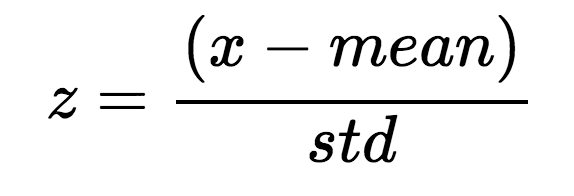

(array([148., 719., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([  698000.,  2138200.,  3578400.,  5018600.,  6458800.,  7899000.,
         9339200., 10779400., 12219600., 13659800., 15100000.]),
 <BarContainer object of 10 artists>)

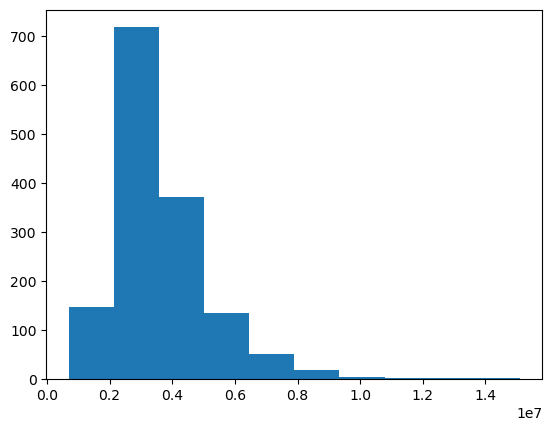

In [216]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.hist(data["Pesos"])

👉 Sklearn [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [217]:
scaler = StandardScaler()

scaler.fit(data[['Pesos']])

data['Pesos'] = scaler.transform(data[['Pesos']])

data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710.0,3.0,1.0,5.0,0.345317,NoAlley,Pave,208500.0
1,1262.0,3.0,1.0,8.0,0.005617,NoAlley,Pave,181500.0
2,1786.0,3.0,1.0,5.0,0.534039,NoAlley,Pave,223500.0
3,1717.0,3.0,1.0,5.0,-0.516514,NoAlley,Pave,140000.0
4,2198.0,4.0,1.0,5.0,0.867448,NoAlley,Pave,250000.0
...,...,...,...,...,...,...,...,...
1451,1647.0,3.0,1.0,5.0,-0.076162,NoAlley,Pave,175000.0
1452,2073.0,3.0,1.0,6.0,0.364189,NoAlley,Pave,210000.0
1453,2340.0,4.0,1.0,9.0,1.075043,NoAlley,Pave,266500.0
1454,1078.0,2.0,1.0,6.0,-0.489778,NoAlley,Pave,142125.0


(array([148., 719., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([-1.83882704, -0.93283503, -0.02684301,  0.87914901,  1.78514102,
         2.69113304,  3.59712506,  4.50311707,  5.40910909,  6.3151011 ,
         7.22109312]),
 <BarContainer object of 10 artists>)

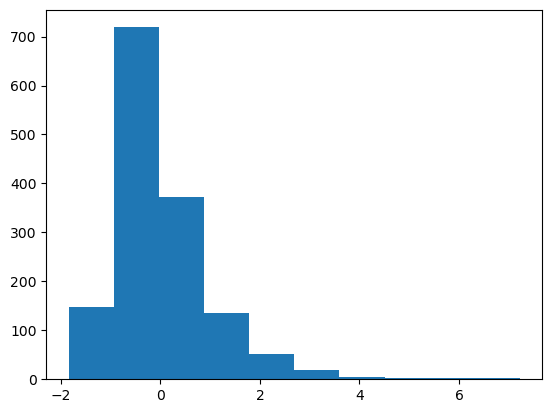

In [218]:

plt.hist(data["Pesos"])

# StandardScaler Recommandation

* Plus efficace lorsque les données sont normalement distribuées
* Ne garantit pas un intervalle commun exact (On ne peut pas savoir à l'avance quel sera l'interval pour toutes les valeurs d'une colonne.)


# Les effets de la standardisation

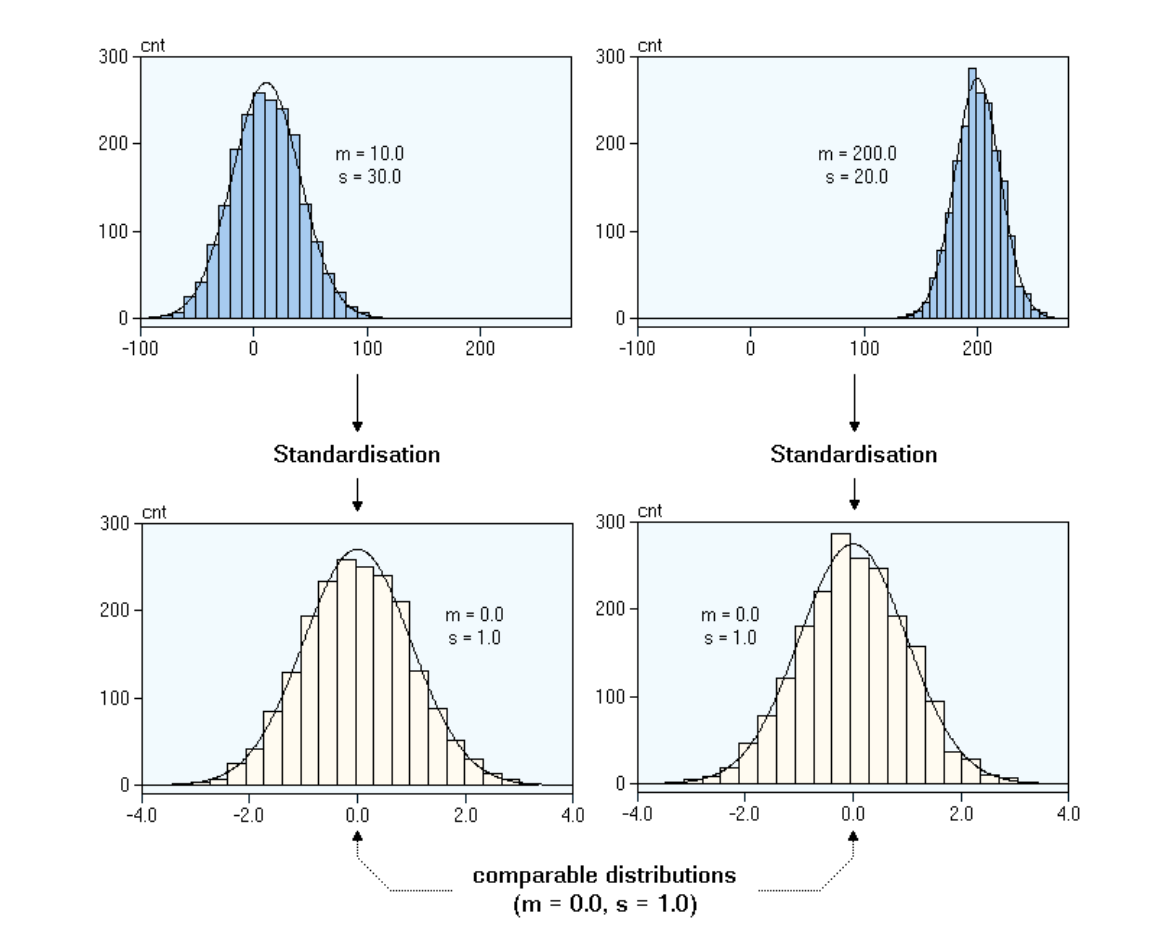

# MinMaxScaler (Normalisation)

--> [**Notebook explicatif**](https://colab.research.google.com/drive/19gy6MXrnIXNGkUYzQBAbUXDZEFyJMUOP?usp=share_link)

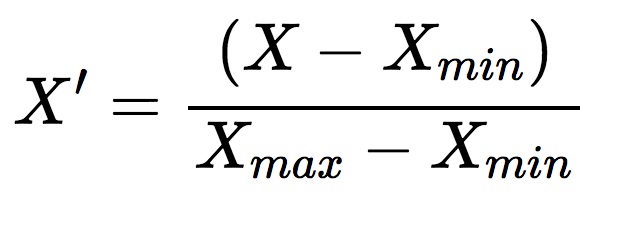

En utilisant le `MinMaxScaler()`, les valeurs de la colonne seront forcément dans l'interval `[0,1]`.

👉 Sklearn [`MinMaxScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

(array([106., 552., 534., 189.,  57.,  12.,   2.,   2.,   1.,   1.]),
 array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
        4580.4, 5111.2, 5642. ]),
 <BarContainer object of 10 artists>)

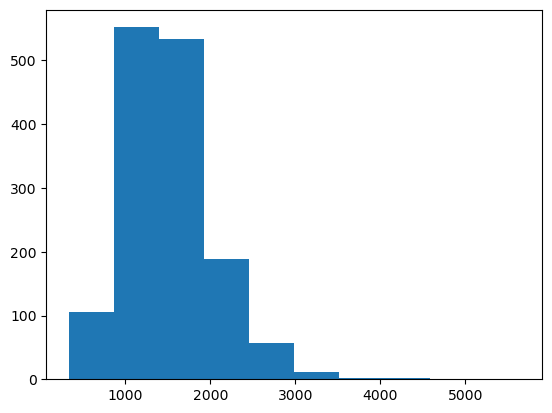

In [219]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

plt.hist(data["GrLivArea"])

In [220]:
scaler = MinMaxScaler()

scaler.fit(data[['GrLivArea']])


data['GrLivArea_minmax'] = scaler.transform(data[['GrLivArea']])

data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,GrLivArea_minmax
0,1710.0,3.0,1.0,5.0,0.345317,NoAlley,Pave,208500.0,0.259231
1,1262.0,3.0,1.0,8.0,0.005617,NoAlley,Pave,181500.0,0.174830
2,1786.0,3.0,1.0,5.0,0.534039,NoAlley,Pave,223500.0,0.273549
3,1717.0,3.0,1.0,5.0,-0.516514,NoAlley,Pave,140000.0,0.260550
4,2198.0,4.0,1.0,5.0,0.867448,NoAlley,Pave,250000.0,0.351168
...,...,...,...,...,...,...,...,...,...
1451,1647.0,3.0,1.0,5.0,-0.076162,NoAlley,Pave,175000.0,0.247362
1452,2073.0,3.0,1.0,6.0,0.364189,NoAlley,Pave,210000.0,0.327619
1453,2340.0,4.0,1.0,9.0,1.075043,NoAlley,Pave,266500.0,0.377920
1454,1078.0,2.0,1.0,6.0,-0.489778,NoAlley,Pave,142125.0,0.140166


(array([106., 552., 534., 189.,  57.,  12.,   2.,   2.,   1.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

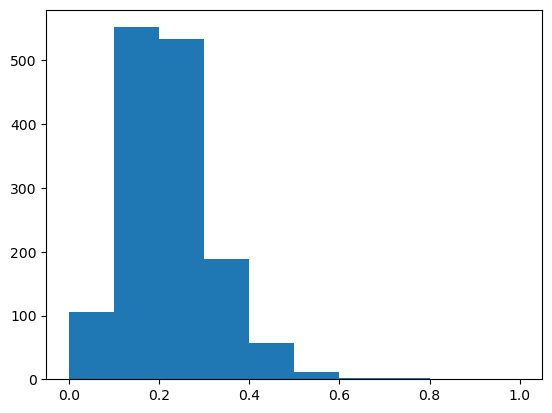

In [221]:
plt.hist(data["GrLivArea_minmax"])

# MinMaxScaler Recommandation

* Garantit une plage fixe, ce qui est important avec les algorithmes basés sur la distance.(`K-neighbors`) 
* Efficace quelle que soit la distribution
* Ne réduit pas l'effet des valeurs aberrantes.


# Standardisation Vs Normalisation

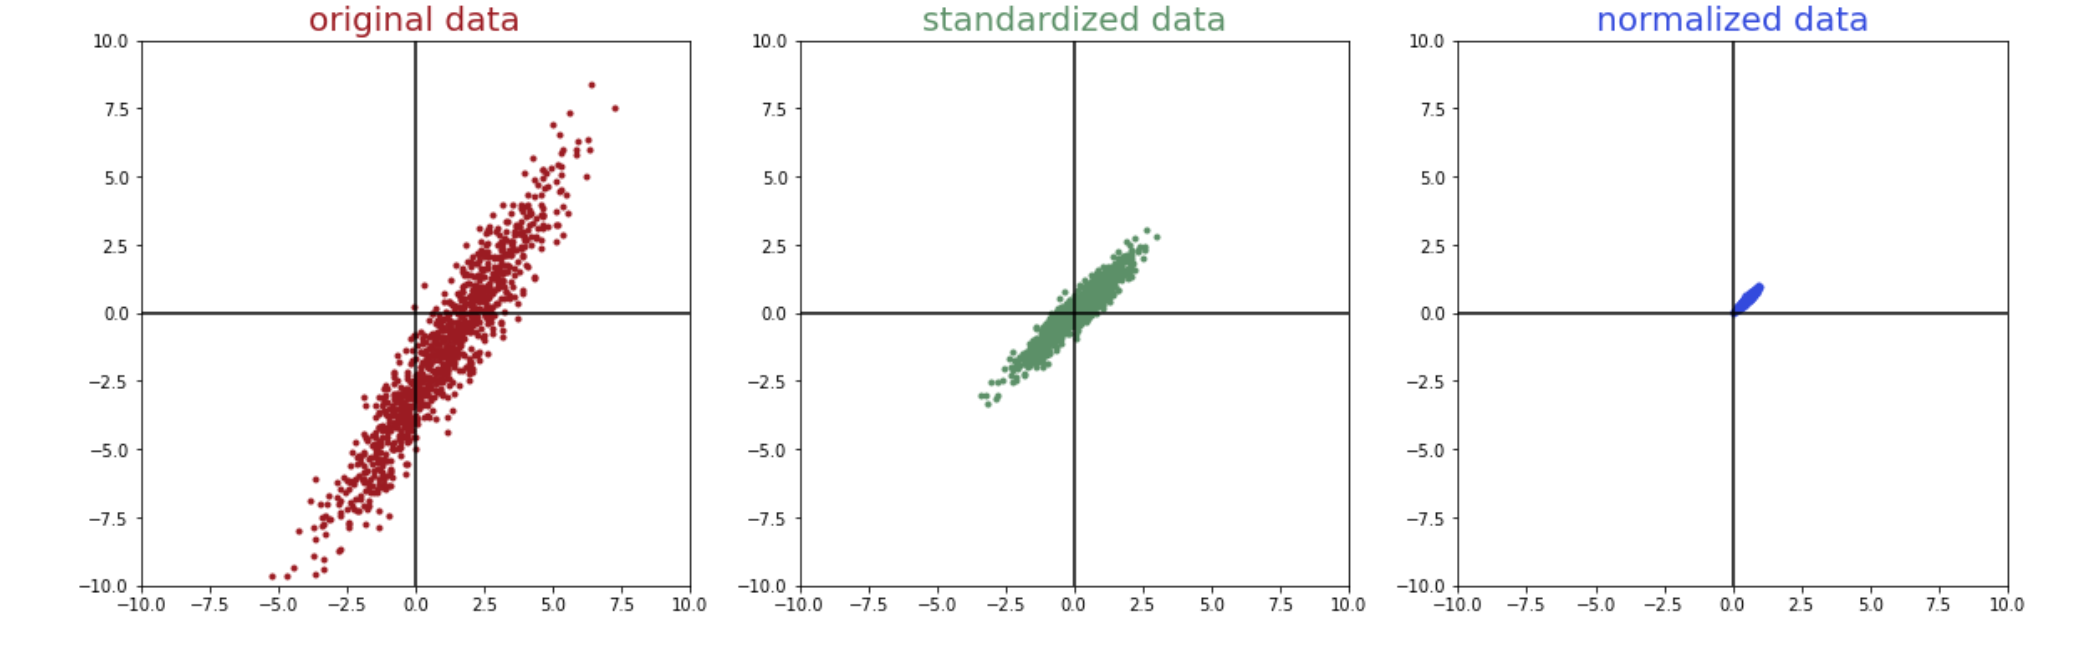

# RobustScaler

Le Robust Scaler diminue l'écart relatif des outliers par rapport aux autres valeurs.

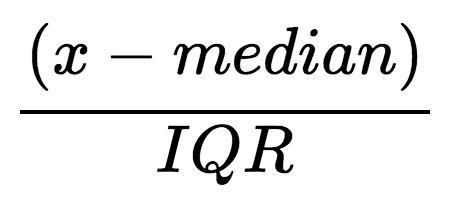

👉 Sklearn [`RobustScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

(array([106., 552., 534., 189.,  57.,  12.,   2.,   2.,   1.,   1.]),
 array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
        4580.4, 5111.2, 5642. ]),
 <BarContainer object of 10 artists>)

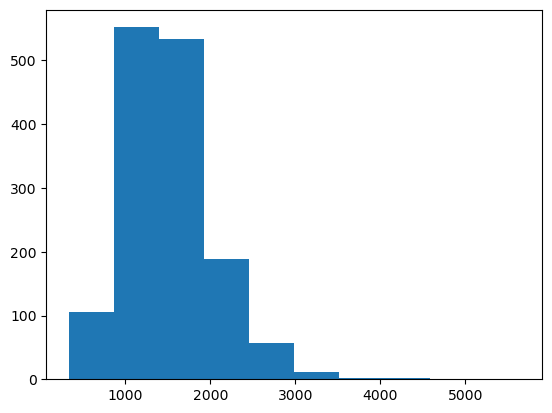

In [222]:
import matplotlib.pyplot as plt

plt.hist(data["GrLivArea"])

In [223]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

r_scaler = RobustScaler()

r_scaler.fit(data[["GrLivArea"]])


RobustScaler()

In [224]:
r_scaler.center_

array([1465.])

In [225]:
r_scaler.scale_

array([648.25])

In [226]:
data.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,SalePrice,GrLivArea_minmax
count,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000
mean,1516.321429,2.866758,1.046703,5.576236,-2.928061e-17,181053.534341,0.222743
std,525.686996,0.816560,0.220627,1.113966,1.000344e+00,79509.245301,0.099037
min,334.000000,0.000000,0.000000,1.000000,-1.838827e+00,34900.000000,0.000000
25%,1130.750000,2.000000,1.000000,5.000000,-6.423288e-01,130000.000000,0.150104
50%,1465.000000,3.000000,1.000000,5.000000,-2.239947e-01,163250.000000,0.213075
75%,1779.000000,3.000000,1.000000,6.000000,4.145151e-01,214000.000000,0.272231
max,5642.000000,8.000000,3.000000,9.000000,7.221093e+00,755000.000000,1.000000


In [227]:
data["GrLivArea_rscaler"] = r_scaler.transform(data[["GrLivArea"]])

data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,GrLivArea_minmax,GrLivArea_rscaler
0,1710.0,3.0,1.0,5.0,0.345317,NoAlley,Pave,208500.0,0.259231,0.377941
1,1262.0,3.0,1.0,8.0,0.005617,NoAlley,Pave,181500.0,0.174830,-0.313151
2,1786.0,3.0,1.0,5.0,0.534039,NoAlley,Pave,223500.0,0.273549,0.495179
3,1717.0,3.0,1.0,5.0,-0.516514,NoAlley,Pave,140000.0,0.260550,0.388739
4,2198.0,4.0,1.0,5.0,0.867448,NoAlley,Pave,250000.0,0.351168,1.130737
...,...,...,...,...,...,...,...,...,...,...
1451,1647.0,3.0,1.0,5.0,-0.076162,NoAlley,Pave,175000.0,0.247362,0.280756
1452,2073.0,3.0,1.0,6.0,0.364189,NoAlley,Pave,210000.0,0.327619,0.937910
1453,2340.0,4.0,1.0,9.0,1.075043,NoAlley,Pave,266500.0,0.377920,1.349788
1454,1078.0,2.0,1.0,6.0,-0.489778,NoAlley,Pave,142125.0,0.140166,-0.596992


In [228]:
max(data["GrLivArea_rscaler"])

6.443501735441574

In [229]:
min(data["GrLivArea_rscaler"])

-1.7446972618588508

(array([106., 552., 534., 189.,  57.,  12.,   2.,   2.,   1.,   1.]),
 array([-1.74469726, -0.92587736, -0.10705746,  0.71176244,  1.53058234,
         2.34940224,  3.16822214,  3.98704204,  4.80586194,  5.62468184,
         6.44350174]),
 <BarContainer object of 10 artists>)

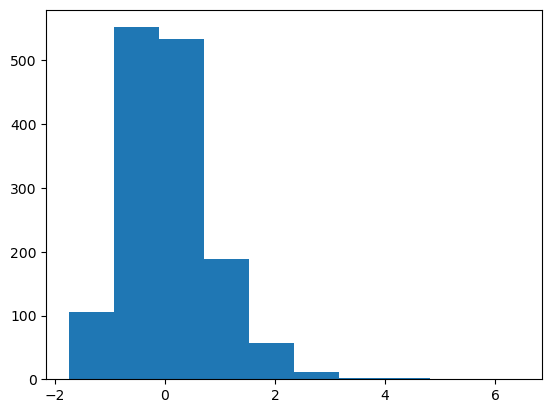

In [230]:
plt.hist(data["GrLivArea_rscaler"])

In [231]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,GrLivArea_minmax,GrLivArea_rscaler
0,1710.0,3.0,1.0,5.0,0.345317,NoAlley,Pave,208500.0,0.259231,0.377941
1,1262.0,3.0,1.0,8.0,0.005617,NoAlley,Pave,181500.0,0.174830,-0.313151
2,1786.0,3.0,1.0,5.0,0.534039,NoAlley,Pave,223500.0,0.273549,0.495179
3,1717.0,3.0,1.0,5.0,-0.516514,NoAlley,Pave,140000.0,0.260550,0.388739
4,2198.0,4.0,1.0,5.0,0.867448,NoAlley,Pave,250000.0,0.351168,1.130737


# Quand faire du Feature Scaling?

https://www.atoti.io/articles/when-to-perform-a-feature-scaling/

> Pour conclure, vous pouvez toujours commencer par adapter votre modèle aux données brutes, normalisées et standardisées et comparer les performances pour obtenir les meilleurs résultats.

# Encoding

L'"encoding" consiste à transformer des données non numériques en une forme numérique équivalente.

## Pourquoi l'`encoding` ?

* La plupart des algorithmes de Machine Learning ne traitent que des données numériques.


# Label Encoder

Dans les cas de classification, `LabelEncoder` est a utiliser pour `y`, qu'il y ait deux classes ou plusieurs classes.

In [232]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()



# One Hot Encoder - "Alley" column

Dans le cas ou une colonne contient plusieurs classes différentes, on utilise `OneHotEncoder`.  
Cet outil va créer autant de colonnes qu'il y a de classes distinctes pour une colonne donnée.
Ainsi, on a 0 lorsque la valeur n'est pas représenté, et 1 lorsque c'est le cas.

In [233]:
data["Alley"].value_counts()

NoAlley    1366
Grvl         50
Pave         40
Name: Alley, dtype: int64

In [234]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit(data[['Alley']])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [235]:
ohe.get_feature_names_out()

array(['Alley_Grvl', 'Alley_NoAlley', 'Alley_Pave'], dtype=object)

In [236]:
ohe.transform(data[['Alley']])

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [237]:
data[ohe.get_feature_names_out()] = ohe.transform(data[['Alley']])

In [238]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,GrLivArea_minmax,GrLivArea_rscaler,Alley_Grvl,Alley_NoAlley,Alley_Pave
0,1710.0,3.0,1.0,5.0,0.345317,NoAlley,Pave,208500.0,0.259231,0.377941,0.0,1.0,0.0
1,1262.0,3.0,1.0,8.0,0.005617,NoAlley,Pave,181500.0,0.174830,-0.313151,0.0,1.0,0.0
2,1786.0,3.0,1.0,5.0,0.534039,NoAlley,Pave,223500.0,0.273549,0.495179,0.0,1.0,0.0
3,1717.0,3.0,1.0,5.0,-0.516514,NoAlley,Pave,140000.0,0.260550,0.388739,0.0,1.0,0.0
4,2198.0,4.0,1.0,5.0,0.867448,NoAlley,Pave,250000.0,0.351168,1.130737,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1647.0,3.0,1.0,5.0,-0.076162,NoAlley,Pave,175000.0,0.247362,0.280756,0.0,1.0,0.0
1452,2073.0,3.0,1.0,6.0,0.364189,NoAlley,Pave,210000.0,0.327619,0.937910,0.0,1.0,0.0
1453,2340.0,4.0,1.0,9.0,1.075043,NoAlley,Pave,266500.0,0.377920,1.349788,0.0,1.0,0.0
1454,1078.0,2.0,1.0,6.0,-0.489778,NoAlley,Pave,142125.0,0.140166,-0.596992,0.0,1.0,0.0


# One Hot Encoder - "Street" column

Dans le cas où une colonne catégorielle à seulement 2 valeurs distincte, il est possible d'utilise `LabelEncoder`,
ou bien d'activer l'option `drop = "if_binary"` de `OneHotEncoder`

In [239]:
data["Street"].value_counts()

Pave    1450
Grvl       6
Name: Street, dtype: int64

In [240]:

ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(data[["Street"]])



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [253]:
ohe.get_feature_names_out()

array(['Street_Pave'], dtype=object)

In [241]:
data["Street"] = ohe.transform(data[["Street"]])
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,GrLivArea_minmax,GrLivArea_rscaler,Alley_Grvl,Alley_NoAlley,Alley_Pave
0,1710.0,3.0,1.0,5.0,0.345317,NoAlley,1.0,208500.0,0.259231,0.377941,0.0,1.0,0.0
1,1262.0,3.0,1.0,8.0,0.005617,NoAlley,1.0,181500.0,0.174830,-0.313151,0.0,1.0,0.0
2,1786.0,3.0,1.0,5.0,0.534039,NoAlley,1.0,223500.0,0.273549,0.495179,0.0,1.0,0.0
3,1717.0,3.0,1.0,5.0,-0.516514,NoAlley,1.0,140000.0,0.260550,0.388739,0.0,1.0,0.0
4,2198.0,4.0,1.0,5.0,0.867448,NoAlley,1.0,250000.0,0.351168,1.130737,0.0,1.0,0.0


# Discretizing

Il s'agit ici de convertir les valeurs continues d'une colonne en valeurs discrètes.

In [242]:
data['SalePriceBinary'] = pd.cut(x=data['SalePrice'],
                                 bins = [data['SalePrice'].min() - 1,
                                 data['SalePrice'].mean(),
                                 data['SalePrice'].max() + 1],
                                 labels = ['cheap', 'expensive'])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,GrLivArea_minmax,GrLivArea_rscaler,Alley_Grvl,Alley_NoAlley,Alley_Pave,SalePriceBinary
0,1710.0,3.0,1.0,5.0,0.345317,NoAlley,1.0,208500.0,0.259231,0.377941,0.0,1.0,0.0,expensive
1,1262.0,3.0,1.0,8.0,0.005617,NoAlley,1.0,181500.0,0.174830,-0.313151,0.0,1.0,0.0,expensive
2,1786.0,3.0,1.0,5.0,0.534039,NoAlley,1.0,223500.0,0.273549,0.495179,0.0,1.0,0.0,expensive
3,1717.0,3.0,1.0,5.0,-0.516514,NoAlley,1.0,140000.0,0.260550,0.388739,0.0,1.0,0.0,cheap
4,2198.0,4.0,1.0,5.0,0.867448,NoAlley,1.0,250000.0,0.351168,1.130737,0.0,1.0,0.0,expensive


Tout les prix inférieurs à la moyenne sont considérés commme `cheap` et les prix supérieurs à la moyenne comme `expensive`.

Sklearn dispose de beaucoup plus d'outils de [`preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) !

# Modelisation - Classification

Notre target `SalePriceBinary` a deux classes:
* Expensive
* cheap

Plutôt que de prédire une valeur continue comme c'est le cas avec les algorithmes de régressions, on utilise ici un algorithme de classification pour prédire une des classes de la target.

Explications sur la **Regression Logistique** : https://datatab.fr/tutorial/logistic-regression

In [243]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,GrLivArea_minmax,GrLivArea_rscaler,Alley_Grvl,Alley_NoAlley,Alley_Pave,SalePriceBinary
0,1710.0,3.0,1.0,5.0,0.345317,NoAlley,1.0,208500.0,0.259231,0.377941,0.0,1.0,0.0,expensive
1,1262.0,3.0,1.0,8.0,0.005617,NoAlley,1.0,181500.0,0.174830,-0.313151,0.0,1.0,0.0,expensive
2,1786.0,3.0,1.0,5.0,0.534039,NoAlley,1.0,223500.0,0.273549,0.495179,0.0,1.0,0.0,expensive
3,1717.0,3.0,1.0,5.0,-0.516514,NoAlley,1.0,140000.0,0.260550,0.388739,0.0,1.0,0.0,cheap
4,2198.0,4.0,1.0,5.0,0.867448,NoAlley,1.0,250000.0,0.351168,1.130737,0.0,1.0,0.0,expensive


In [244]:
data['SalePriceBinary'].value_counts()

cheap        903
expensive    553
Name: SalePriceBinary, dtype: int64

In [245]:
target_encoder = LabelEncoder()
target_encoder.fit(data['SalePriceBinary'])

y = target_encoder.transform(data['SalePriceBinary'])
y

array([1, 1, 1, ..., 1, 0, 0])

In [246]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,GrLivArea_minmax,GrLivArea_rscaler,Alley_Grvl,Alley_NoAlley,Alley_Pave,SalePriceBinary
0,1710.0,3.0,1.0,5.0,0.345317,NoAlley,1.0,208500.0,0.259231,0.377941,0.0,1.0,0.0,expensive
1,1262.0,3.0,1.0,8.0,0.005617,NoAlley,1.0,181500.0,0.174830,-0.313151,0.0,1.0,0.0,expensive
2,1786.0,3.0,1.0,5.0,0.534039,NoAlley,1.0,223500.0,0.273549,0.495179,0.0,1.0,0.0,expensive
3,1717.0,3.0,1.0,5.0,-0.516514,NoAlley,1.0,140000.0,0.260550,0.388739,0.0,1.0,0.0,cheap
4,2198.0,4.0,1.0,5.0,0.867448,NoAlley,1.0,250000.0,0.351168,1.130737,0.0,1.0,0.0,expensive


In [247]:
X = data.select_dtypes('number').drop(columns=['Pesos', 'SalePrice', 'GrLivArea', 'GrLivArea_minmax'])
X

,BedroomAbvGr,KitchenAbvGr,OverallCond,Street,GrLivArea_rscaler,Alley_Grvl,Alley_NoAlley,Alley_Pave
0,3.0,1.0,5.0,1.0,0.377941,0.0,1.0,0.0
1,3.0,1.0,8.0,1.0,-0.313151,0.0,1.0,0.0
2,3.0,1.0,5.0,1.0,0.495179,0.0,1.0,0.0
3,3.0,1.0,5.0,1.0,0.388739,0.0,1.0,0.0
4,4.0,1.0,5.0,1.0,1.130737,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1451,3.0,1.0,5.0,1.0,0.280756,0.0,1.0,0.0
1452,3.0,1.0,6.0,1.0,0.937910,0.0,1.0,0.0
1453,4.0,1.0,9.0,1.0,1.349788,0.0,1.0,0.0
1454,2.0,1.0,6.0,1.0,-0.596992,0.0,1.0,0.0


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)



LogisticRegression()

In [249]:
# Regression
log_reg.score(X_test, y_test)

0.8406593406593407

Le score renvoyé par défaut pour un modèle de classification est `accuracy`.  
Comme le `r_squared` pour les modèles de regression, ce score est compris entre 0 et 1.

`accuracy` et `r_squared` sont des métriques. Il existe beaucoup de métriques, que nous découvriront plus tard.

# Etapes suivantes 

## Tester différents modèles, avec différents paramètres

--> Utiliser GridSearch, RandomSearch...

## Regarder l'influence des features (cette étape varie selon l'algorithme utilisé)

--> Potentiellement refaire son modèle avec différents features, différent preprocessing


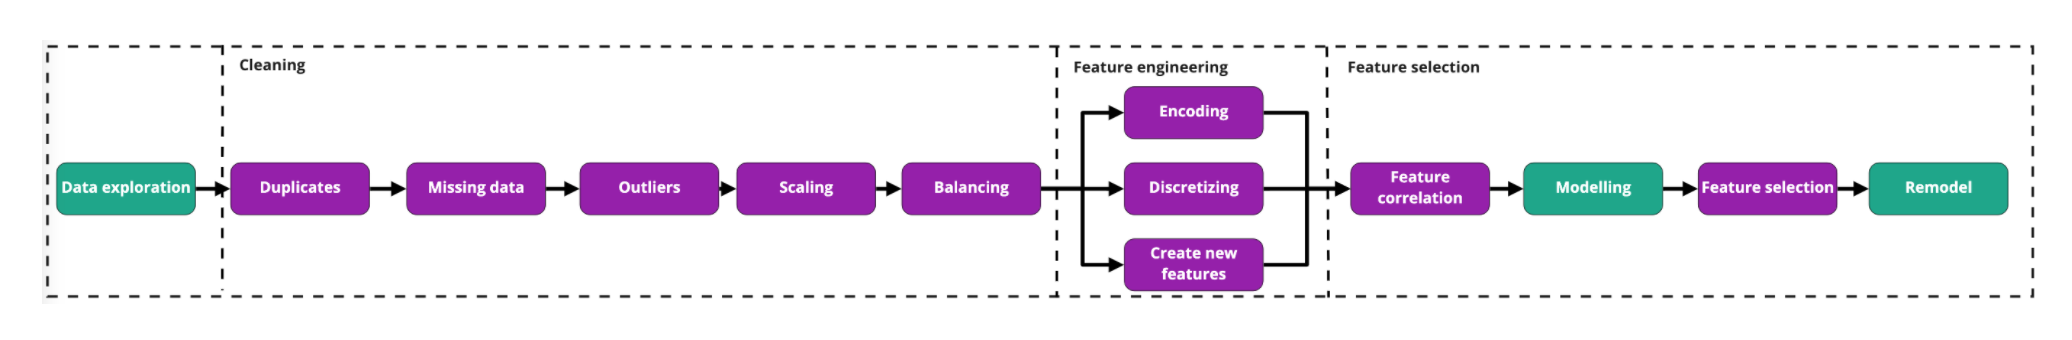